<a href="https://colab.research.google.com/github/lapshinaaa/applied-statistics-tasks/blob/main/AB2_Parametric_Tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars_2020/sem08/real_expect.png" width="500">

# Parametric Tests
</center>

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency
from scipy.stats import norm
from math import *

### Задача №1: Лучше найди себе девушку! (25 баллов)

В этой задаче вам предстоит проверить несколько гипотез на датасете из американского сервиса знакомств. Датасет называется `dating_is_hard.csv`

Колонки датасета:
- `age` - возраст
- `is_heavy_drinker` - алкоголизм в булевом виде
- `height` - рост в дюймах
- `sex` - полов может быть только два - f для женщин и m для мужчин.
- `smokes` - зависимость от табака в булевом виде
- `location` - место жительства
- `offspring` - отношение к детям

Для каждого пункта нужно расписать нулевую и альтернативную гипотезу, описать какой именно критерий вы используете, перечислить предпослыки необходимые для его использования, а также вычислить значение статистики и p-value, если это возможно.

In [ ]:
df = pd.read_csv('dating_is_hard.csv')

In [ ]:
df.head(2)

,Unnamed: 0,age,is_heavy_drinker,height,sex,smokes,location,offspring
0,uid_1,27,False,64,f,True,san francisco california,no opinion
1,uid_2,38,False,65,f,False,oakland california,wants kids


__a) [5 баллов]__ Рост в приложениях для знакомств не проверяют, поэтому можно поставить себе любой и никто не узнает. Посмотрим же, врут ли люди о своём росте.

Проверьте две гипотезы: совпадает ли средний рост мужчин в приложении с их реальным средним ростом и совпадает ли средний рост женщин в приложении с их реальным средним ростом

__P.S.__ Средний рост мы вам не дамим. Ищите сами и приложите ссылку на источник в решении.

Average male heights in the US: ~69 inches (including African, Hispanic and Latino Americans) (source: https://en.wikipedia.org/wiki/Average_human_height_by_country?ysclid=mf4bxr44af887002288)

Average female height in the US: ~ 63.5 inches (including African, Hispanic and Latino Americans) (source: https://en.wikipedia.org/wiki/Average_human_height_by_country?ysclid=mf4bxr44af887002288)

H0: Average male (female) height among the US population is equal to the one listed on the dating app.

H1: Average male (female) height among the US population does NOT match the one listed on the dating app.

Checking normality of the distribution before using the T-test:

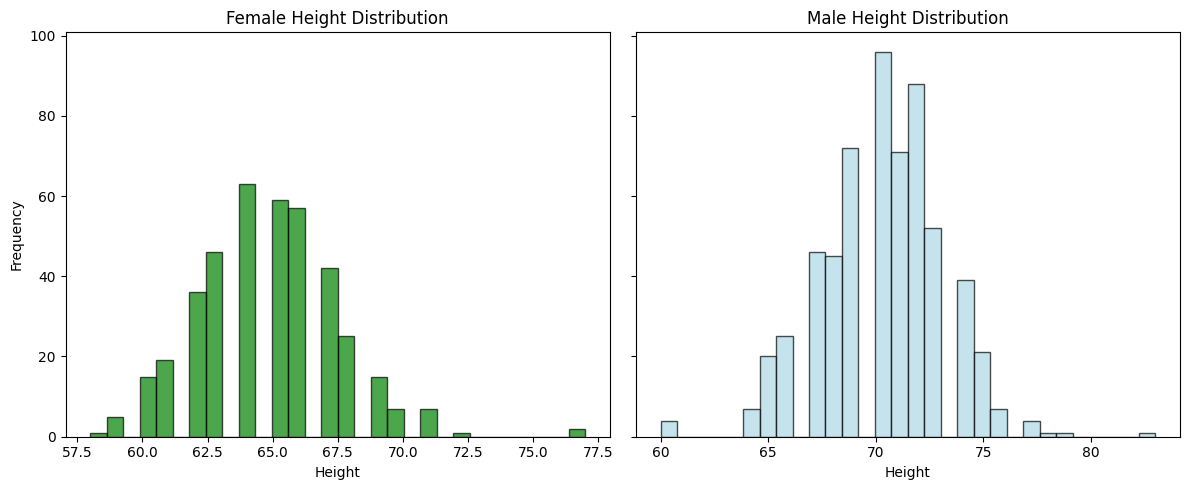

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# females
axes[0].hist(df.loc[df['sex'] == 'f', 'height'], bins=30, alpha=0.7, color='green', edgecolor='black')
axes[0].set_title("Female Height Distribution")
axes[0].set_xlabel("Height")
axes[0].set_ylabel("Frequency")

# males
axes[1].hist(df.loc[df['sex'] == 'm', 'height'], bins=30, alpha=0.7, color='lightblue', edgecolor='black')
axes[1].set_title("Male Height Distribution")
axes[1].set_xlabel("Height")

plt.tight_layout()
plt.show()

I'm going to be using the T-test. We have a relatively small sample size and sample data is distributed normally (https://www.linkedin.com/pulse/understanding-t-test-comprehensive-guide-data-dishant-salunke-dzfjf/)

In [ ]:
real_male_height = 69
real_female_height = 63.5

male_heights_app = df.loc[df['sex'] == 'm', 'height']
female_heights_app = df.loc[df['sex'] == 'f', 'height']

In [ ]:
t_test_value_male, p_value_male = sts.ttest_1samp(male_heights_app, popmean=real_male_height)
t_test_value_female, p_value_female = sts.ttest_1samp(female_heights_app, popmean=real_female_height)

In [ ]:
t_test_value_male, p_value_male

(np.float64(11.089040037689081), np.float64(4.049306510002542e-26))

In [ ]:
t_test_value_female, p_value_female

(np.float64(9.8482732730527), np.float64(1.2552189176957907e-20))

__Results:__ The dataset’s mean height differs significantly from the actual value for both males and females. In both cases, the p-value is extremely small, meaning that the probability of observing such a large difference if the null hypothesis were true is effectively zero. Therefore, we reject the null hypothesis. These results suggest that both males and females systematically misreport their height on the dating app.

__б) [10 баллов]__ По моим наблюдениям (состоящим из одного человека) мужчин-алкоголиков гораздо больше женщин. В нашем датасете алкоголизмом мы будем считать параметр `is_heavy_drinker`

Проверьте гипотезу: Действительно ли доля мужчин-алкоголиков выше доли женщин-алкоголиков?

H0: The proportion of heavy drinkers is the same for males and females.

H1: The proportionn of heavy drinkers is higher for males (one-sided/directed alternative).

In [ ]:
male_alcoholics = df.loc[(df['sex'] == 'm') & (df['is_heavy_drinker'] == 1)]
female_alcoholics = df.loc[(df['sex'] == 'f') & (df['is_heavy_drinker'] == 1)]

In [ ]:
num_obs_male = df[df['sex'] == 'm'].shape[0]
num_obs_female = df[df['sex'] == 'f'].shape[0]

In [ ]:
count_drinkers = [male_alcoholics.shape[0], female_alcoholics.shape[0]]
nobs = [num_obs_male, num_obs_female]

In [ ]:
z_test, p_value = proportions_ztest(count_drinkers, nobs, alternative='larger')

In [ ]:
z_test, p_value

(np.float64(0.42348557082196425), np.float64(0.33597051196139227))

__Results:__ The two-proportion z-test yielded 𝑧 = 0.42, 𝑝 = 0.34; therefore, we fail to reject the null hypothesis and cannot conclude that the proportion of heavy drinkers differs between males and females in this dataset.

__в) [10 баллов]__ Мой друг Володька решил бросить курить и теперь курит только когда пьёт. Это навело меня на мысль о том, что курение привлекает алкоголиков сильнее, чем обычных людей.

Проверьте гипотезу: Действительно ли алкоголики больше склонны к курению, чем неалкоголики?

H0: the smoking rate among alcoholics is equal to/similar to the smoking rate among non-alcoholics.

H1 (directed alternative): alcoholics are more inclined to be smokers.

In [ ]:
# smokers_alcoholics = df.loc[(df['is_heavy_drinker'] == 1) & (df['smokes'] == 1)]
# smokers_non_alcoholics = df.loc[(df['is_heavy_drinker'] == 0) & (df['smokes'] == 1)]

In [ ]:
# building contingency table for chi2 test
ct = pd.crosstab(df['is_heavy_drinker'], df['smokes'])

In [ ]:
ct

smokes,False,True
is_heavy_drinker,,
False,561,357
True,47,35


In [ ]:
chi2, p, dof, expected = chi2_contingency(ct)

print(f"Chi-square = {chi2:.3f}, df = {dof}, p-value = {p:.4f}")

Chi-square = 0.309, df = 1, p-value = 0.5781


**Results:** A chi-square test of independence was conducted to examine the relationship between alcoholism and smoking.  
The test yielded:  

$$\\chi^2(1, N=...) = 0.309, \\ p = 0.578$$  

Since the p-value is much greater than 0.05, we fail to reject the null hypothesis.  
This indicates that, in this dataset, there is no statistically significant association between being an alcoholic and being a smoker.

### Задача №2. Тестируем новый интерфейс страницы отеля  (25 баллов)

Все мы любим отдыхать! А злые корпорации любят наживаться на нашем желании отдыхать.

Представим что вы работаете в одной из таких корпораций и занимаетесь аналитикой сайта для бронирования отелей. Процесс бронирования имеет привычную структуру:
- вбиваете в поиск направленния и даты
- получаете выдачу вариантов отелей
- переходите на страницу отеля
- нажимаете кнопку "забронировать"
- попадаете на страницу оплаты
- оплачиваете

Очевидно, на всех этапах этой воронки вы можете потерять пользователя. Поисследовав поведение пользователей вы решили внести изменения на странице об отеле и хотите чтобы выросла конверсия в бронирования

__а) [3 балла]__ Подумайте, какие изменения могли бы быть внесены?

**Answer:**
1. Allow users to complete the booking directly on the platform without redirection to the hotel’s own website. Removing extra steps reduces friction and drop-offs.


2. Provide advanced filters beyond date and destination (e.g., star rating, amenities, price range, cancellation policy). This helps users quickly find relevant options and reduces frustration from irrelevant results.

3. Ensure that each hotel page includes all critical details—reviews, amenities (Wi-Fi, parking, breakfast), photos, availability, and even contextual information like local weather forecasts. Consider adding a chatbot or FAQ assistant for quick answers.

4. Place the “Book now” button prominently and consistently across the page. Use persuasive design elements such as urgency cues (“Only 5 rooms left at this price”) or social proof (“Booked by 120 people in the last week”) to encourage faster decisions.

Перед вами датасет `ab_test.csv`, в нем содержатся данные о пользователях в период теста

`user_id` - уникальный идентификатор пользователя \
`sex` - пол пользователя \
`datetime` - дата и время посещения сайта (начала сессии) \
`district` - регион расположения отеля \
`hotel_page` - был ли пользователь на странице отеля в сессии \
`payment_page` - был ли пользователь на странице оплаты в сессии \
`payment` - была ли произведена оплата в сессии \
`group` - группа в эксперименте

Поскольку изменения вносились на странице отеля нас интересуют именно дошедшие до этой страницы пользователи. Поэтому колонка `hotel_page` принимает значение 1 всегда

In [ ]:
df = pd.read_csv("ab_simpson.csv")
df.head()

,Unnamed: 0,user_id,sex,datetime,district,hotel_page,payment_page,payment,group
0,0,3326449108867616315,1,11/15/2023 12:02 AM,Южный федеральный округ,1,1,0,control
1,1,7887645543455909870,1,11/02/2023 09:12 PM,Центральный федеральный округ,1,1,0,control
2,2,6148146969124793824,1,11/10/2023 10:06 AM,Центральный федеральный округ,1,1,1,control
3,3,2721602951940155275,0,11/12/2023 07:10 PM,Центральный федеральный округ,1,1,0,control
4,4,1829030712785972138,0,05/01/2024 05:19 AM,Южный федеральный округ,1,0,0,test


__б) [3 балла]__ Сделайте небольшой eda, какие выводы вы можете сделать о данных? Корректно ли проводился аб тест? Найдите ошибки и объясните почему это некорректно.

In [ ]:
df['group'].value_counts(normalize=True) # almost equal proportions

,proportion
group,
test,0.502567
control,0.497433


In [ ]:
df['district'].value_counts()

,count
district,
Южный федеральный округ,120749
Центральный федеральный округ,120336
Приволжский федеральный округ,60333
Северо-Западный федеральный округ,50071
Уральский федеральный округ,26189
Сибирский федеральный округ,16072
Дальневосточный федеральный округ,8057


In [ ]:
group_district_cross = pd.crosstab(df['group'], df['district'])

In [ ]:
group_district_cross

district,Дальневосточный федеральный округ,Приволжский федеральный округ,Северо-Западный федеральный округ,Сибирский федеральный округ,Уральский федеральный округ,Центральный федеральный округ,Южный федеральный округ
group,,,,,,,
control,1999,23985,39974,7994,5996,79949,39975
test,6058,36348,10097,8078,20193,40387,80774


There is a distinct imbalance with a much greater number of tests having been conducted in certain regions with the other ones being largely ignored.

Раскроем правду. Изменение продукта касалось адаптации страницы отеля под его регион. Например, в южных регионах пользователям на странице отеля предлагались активности для пляжного отдыха, а в северном и центральном регионе сразу подбирались ближайшие экскурсии и так далее.

__в) [5 баллов]__ Проанализируйте, как ведут себя конверсии в страницу оплаты и в оплату в разных регионах? Опишите выводы.

In [ ]:
conversion_by_region = (
    df.groupby('district')
    .agg(users=('user_id','count'),
         to_payment_page=('payment_page','sum'),
         paid=('payment','sum'))
    .assign(conv_to_pay=lambda x: x.to_payment_page / x.users,
            conv_to_paid=lambda x: x.paid / x.users)
    .sort_values('users', ascending=False)
)

In [ ]:
conversion_by_region

,users,to_payment_page,paid,conv_to_pay,conv_to_paid
district,,,,,
Южный федеральный округ,120749,97407,37137,0.806690,0.307555
Центральный федеральный округ,120336,109514,33426,0.910068,0.277772
Приволжский федеральный округ,60333,38017,18205,0.630120,0.301742
Северо-Западный федеральный округ,50071,35252,13416,0.704040,0.267940
Уральский федеральный округ,26189,11485,8112,0.438543,0.309748
Сибирский федеральный округ,16072,4983,4637,0.310042,0.288514
Дальневосточный федеральный округ,8057,1412,2492,0.175251,0.309296


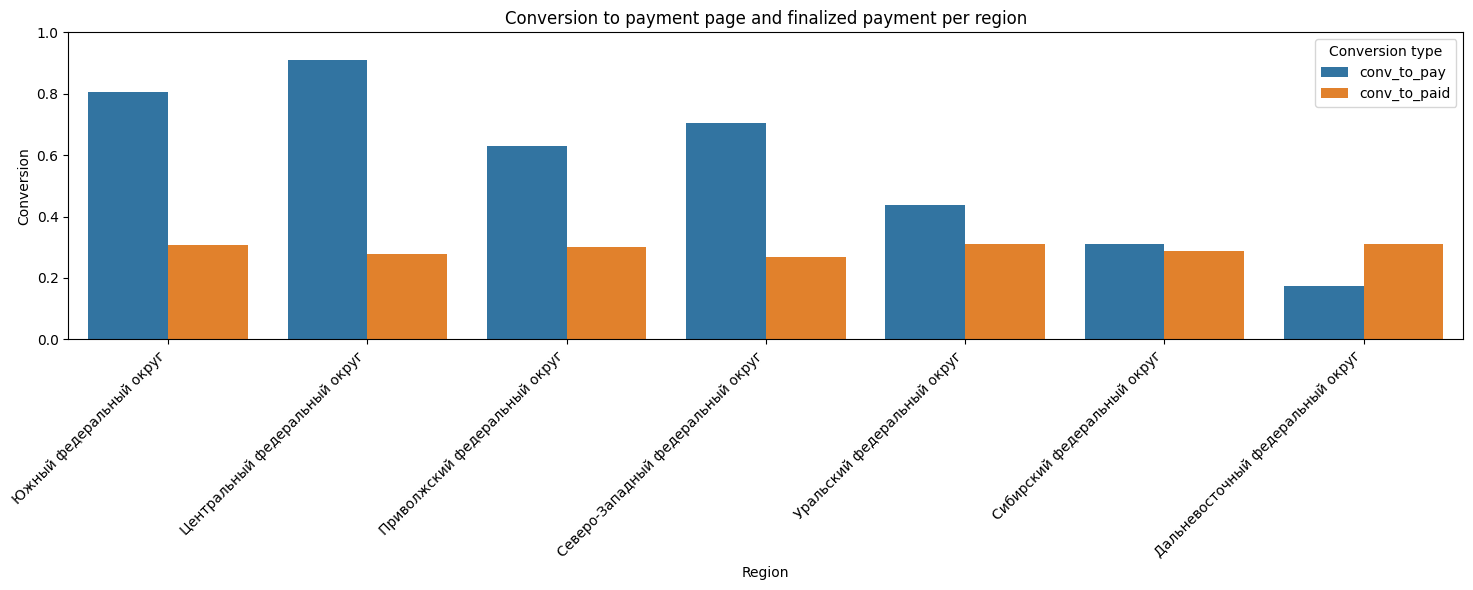

In [ ]:
plt.figure(figsize=(15, 6))

ax = sns.barplot(
    data=conversion_by_region.reset_index().melt(id_vars='district',
                                                  value_vars=['conv_to_pay', 'conv_to_paid'],
                                                  var_name='conversion_type',
                                                  value_name='rate'),
    x='district', y='rate', hue='conversion_type'
)

plt.title('Conversion to payment page and finalized payment per region')
plt.xlabel('Region')
plt.ylabel('Conversion')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.legend(title='Conversion type')
plt.tight_layout()
plt.show()

### Regional Conversion Analysis

Conversion rates to the payment page are higher in ЮФО, ЦФО, ПФО, and СЗФО compared to other regions.  
This suggests that UX/UI strategies in УФО, СФО, and ДФО may require adjustments to improve user progression through the funnel.  

However, once users reach the payment page, the final conversion to completed payment is approximately the same across all regions.  
This indicates that a higher conversion to the payment page does not necessarily translate into more finalized bookings.  
Ultimately, improving the last stage of the funnel (successful payment) is essential, since final conversion is the true measure of effectiveness.

__г) [5 баллов]__ Проанализируйте, улучшилась ли воронка для пользователей в тестовой группе по сравнению с контрольной вне зависимости от региона? Опишите выводы.

In [ ]:
funnel_by_group = (
    df.groupby('group')
      .agg(users=('user_id','count'),
           to_payment_page=('payment_page','sum'),
           paid=('payment','sum'))
      .assign(conv_to_pay=lambda x: x.to_payment_page / x.users,
              conv_to_paid=lambda x: x.paid / x.users)
)

control = funnel_by_group.loc['control']
test = funnel_by_group.loc['test']

# percentage differences for test and control
diff_row = pd.DataFrame({
    'conv_to_pay': [ (test.conv_to_pay - control.conv_to_pay) / control.conv_to_pay * 100 ],
    'conv_to_paid': [ (test.conv_to_paid - control.conv_to_paid) / control.conv_to_paid * 100 ]
}, index=['percentage_diff (%)'])

funnel_summary = pd.concat([
    funnel_by_group[['conv_to_pay','conv_to_paid']],
    diff_row
])

funnel_summary

,conv_to_pay,conv_to_paid
control,0.756999,0.250170
test,0.726803,0.333885
percentage_diff (%),-3.988946,33.463053


The conversion rate to the payment page decreased slightly in the test group compared to the control. This, however, may indicate a positive outcome: users who are not genuinely interested drop off earlier in the funnel rather than proceeding further. At the same time, the conversion rate to completed payment increased substantially in the test group. This suggests that users who did proceed to the payment page were more motivated and determined to complete their booking.

Overall, the UX/UI changes appear to have had a positive impact on the funnel, improving the quality of traffic that reaches the payment page and leading to higher final conversion.

In [ ]:
df

,Unnamed: 0,user_id,sex,datetime,district,hotel_page,payment_page,payment,group
0,0,3326449108867616315,1,11/15/2023 12:02 AM,Южный федеральный округ,1,1,0,control
1,1,7887645543455909870,1,11/02/2023 09:12 PM,Центральный федеральный округ,1,1,0,control
2,2,6148146969124793824,1,11/10/2023 10:06 AM,Центральный федеральный округ,1,1,1,control
3,3,2721602951940155275,0,11/12/2023 07:10 PM,Центральный федеральный округ,1,1,0,control
4,4,1829030712785972138,0,05/01/2024 05:19 AM,Южный федеральный округ,1,0,0,test
...,...,...,...,...,...,...,...,...,...
401802,401802,1998190998209076143,1,11/01/2023 06:38 PM,Сибирский федеральный округ,1,0,0,control
401803,401803,1246632709977091801,0,04/29/2024 04:02 AM,Приволжский федеральный округ,1,1,0,test
401804,401804,3689258679250689626,0,11/06/2023 08:55 PM,Центральный федеральный округ,1,1,1,control
401805,401805,7863032986390660588,0,11/05/2023 10:48 PM,Приволжский федеральный округ,1,0,0,control


__д) [5 баллов]__ Проанализируйте распределение интересов пользователей в тестовой и контрольной группе. Какими регионами они интересовались? Изменились ли их предпочтения?

In [ ]:
region_interest = (
    df.groupby(['group', 'district'])
      .agg(users=('user_id','count'))
      .reset_index()
)

# rank regions by popularity for each group (test and control)
region_interest['rank'] = region_interest.groupby('group')['users'].rank(method='first', ascending=False)
top3 = region_interest.sort_values(['group','users'], ascending=[True,False]).groupby('group').head(3)
bottom3 = region_interest.sort_values(['group','users'], ascending=[True,True]).groupby('group').head(3)

summary = {
    'top_regions': top3.groupby('group')['district'].apply(list),
    'bottom_regions': bottom3.groupby('group')['district'].apply(list)
}
summary_df = pd.DataFrame(summary)
summary_df

,top_regions,bottom_regions
group,,
control,"[Центральный федеральный округ, Южный федераль...","[Дальневосточный федеральный округ, Уральский ..."
test,"[Южный федеральный округ, Центральный федераль...","[Дальневосточный федеральный округ, Сибирский ..."


/tmp/ipython-input-795726021.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='users', y='district', ax=ax, palette="viridis")
/tmp/ipython-input-795726021.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='users', y='district', ax=ax, palette="viridis")


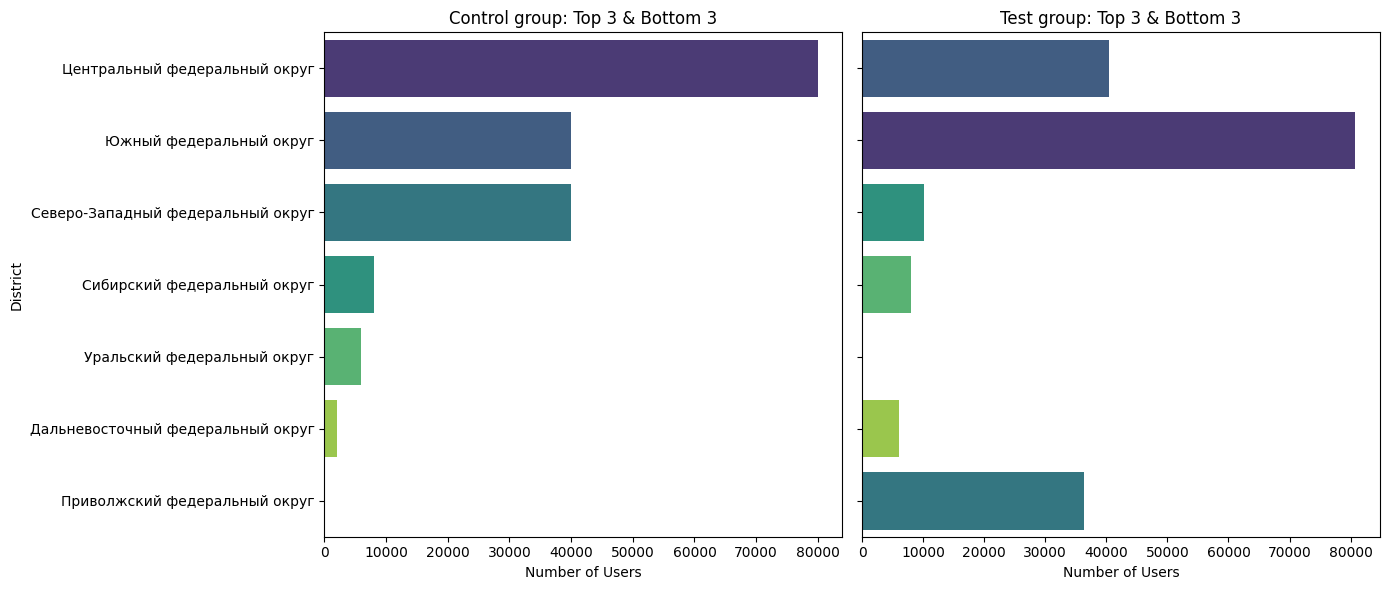

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)

for ax, g in zip(axes, ['control','test']):
    data_g = region_interest[region_interest['group']==g].sort_values('users', ascending=False)
    top3 = data_g.head(3)
    bottom3 = data_g.tail(3)
    subset = pd.concat([top3, bottom3])

    sns.barplot(data=subset, x='users', y='district', ax=ax, palette="viridis")
    ax.set_title(f"{g.capitalize()} group: Top 3 & Bottom 3")
    ax.set_xlabel("Number of Users")
    ax.set_ylabel("District")

plt.tight_layout()
plt.show()

For certain regions (СЗФО, УФО, ЮФО), user interest appears to have decreased, while in other regions interest has increased. At the same time, the overall test group shows a higher conversion to paid bookings compared to the control group. In other words, the aggregated result (an overall improvement in the funnel) partly contradicts the patterns observed within individual regions.

This illustrates a form of Simpson’s paradox: although the overall test group demonstrates an uplift, some regional subgroups move in the opposite direction. This suggests that the effect of the new UX/UI features is not uniform across regions. Improvements in certain regions may have driven the overall positive result (e.g., stronger performance in ЮФО), while in other regions the changes may not have been as effective. Therefore, the impact of the new interface should be analyzed at both the aggregate and subgroup levels before drawing final conclusions.

Если вы все сделали правильно, то у вас получился противоречивые ответы в пунктах 3 и 4. Вы попали в ловушку Парадокса Симпсона. Подробнее о нем можно почитать [здесь](https://ru.wikipedia.org/wiki/Парадокс_Симпсона)

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/simpson.jpg?raw=true" width="350" align='center'>

## Задача №3: Не подглядывать! (50 баллов)


На американских выборах 2020 года в некоторых штатах проходила очень конкурентная борьба между кандидатами. По мере подсчета голосов перевес в голосах склонялся то в пользу демократов, то в пользу республиканцев. И вот, в один из таких моментов, когда чаша весов склонилась в пользу республиканцев, Д. Трамп написал в твиттер "stop the count!", что означало призыв к остановке подсчета голосов.

_Здесь у вас мог возникнуть вопрос, и зачем нам это?_

Ответ очень прост. В этой ситуации всем очевидно, что призыв Трампа не мог быть осуществлен, то есть прерывать подсчет голосов раньше времени кажется довольно глупым способом выявления победителя. И вот абсолютно такой же способ принятия решения есть и в А/Б-тестах, только теперь многим аналитикам он уже кажется не столь очевидным, что приводит к существенным ошибкам в заключении выводов.

_Решив эту задачу, мы познакомимся с такой проблемой подробнее и поймем, как не стоит делать, когда вы запускаете А/Б-тест._

Чтобы понять, в чем же именно заключается проблема, мы с вами будем проводить симуляции А/Б-тестов. Это когда мы генерируем данные уже со знаниями, как эти данные устроены. А затем, запуская процедуру проверки гипотез над такими симулированными данными, мы будем оценивать, что происходит на практике (при запуске А/Б-теста).

На практике же всегда неизвестно, как устроены данные, и проводя А/Б-тест мы пытаемся зафиксировать различия. Еще раз, здесь же мы будем знать об устройстве данных, а затем будем смотреть на поведение А/Б-теста, то есть как будто бы смотреть на тест с обратной стороны.

_Перед тем как идти дальше, остановитесь здесь и еще раз зафиксируйте это!_

__а) [10 баллов]  Подсчет размера выборки для А/Б-теста__

Предположим, что вы хотите провести А/Б-тест внутри вашего приложения. Вы выбрали некоторую метрику $X$ – случайную величину из нормального распределения с мат. ожиданием $100$ у.е. и стандартным отклонением $40$ у.е – это ваш бейзлайн (группа А). Рассчитайте, сколько дней вам нужно крутить такой А/Б-тест, если:

1. Вы ожидаете получить минимальный размер эффекта в $5$ у.е.;
2. Вы хотите зафиксировать ошибку первого рода на уровне $\alpha=5\%$, а ошибку второго рода на уровне $\beta=20\%$;
3. Вы точно знаете, что в группе Б стандартное отклонение метрики составляет также $20$ у.е.
4. Посещаемость вашего приложения ежедневно составляет $200$ пользователей, и вы готовы раскатить тест на $100\%$ трафика.

Формула для расчета числа наблюдений _для одной группы_:

$$
n_{\text{one group}} = \frac{(\sigma_A^2 + \sigma_B^2) \cdot (z_{1-\frac{\alpha}{2}} + z_{1-\beta})^2}{MDE^2},
$$

__Подсказка:__ Помните, что после получения общего числа наблюдений вам нужно выразить это в дни! Вы должны получить целое число. Также будьте аккуратны с подсчетом трафика и кол-ва наблюдений – обратите внимание, со скольким числом групп вы работаете!

In [3]:
sigma_A = 40
sigma_B = 20
MDE = 5
alpha = 0.05
beta = 0.2

In [6]:
z_alpha = norm.ppf(1 - alpha/2)
z_beta = norm.ppf(1 - beta)

In [7]:
n = ((sigma_A**2 + sigma_B**2) * (z_alpha + z_beta)**2) / MDE**2

In [12]:
number_days = n / 200 * 2

In [16]:
ceil(number_days)

7

__б) [20 баллов] Симуляция А/Б-теста__

Теперь нам нужно запустить А/Б-тест. Для этого:

1. Сгенерируйте выборку данных из нормального распределения для группы А и Б в конкретный один день. Считайте, что в группе Б математическое ожидание составляет $105$ у.е., то есть с учетом размера вашего минимального ожидаемого эффекта из предыдущего пункта.

In [3]:
group_A = np.random.normal(loc=100, scale=40, size=100)
group_B = np.random.normal(loc=105, scale=20, size=100)

In [4]:
group_A

array([107.58784187, 127.33624891,  65.89475613,  51.14121974,
       117.65076468,  91.27402991, 127.20882614,  93.93590305,
       120.87568085, 162.38915744,  22.63269051,  89.37256984,
        72.05237099, 128.01179438, 105.70138917, 162.50315732,
       101.58921075, 151.32446063, 123.68952539, 108.89000106,
       156.14306942, 133.78308156,  43.79496801,  66.2663769 ,
       108.91105197, 167.22821039, 121.20281255, 125.77434543,
        34.16135405,  59.81136523,  71.08822873,  55.33729634,
        46.16269861,  38.15875313, 118.67456108,  92.41109066,
       103.1252252 , 133.98695862,  79.52542211, 137.58365203,
        80.2900842 , 157.43692298,  59.55819624,  95.4158257 ,
        54.97031453, 113.59081008,  88.59976416,  94.44924401,
        93.20190955, 161.46163418,  62.10823201, 169.75169049,
       112.32955216,  60.34072451,  40.06866078,  96.90816802,
        91.96543352, 111.46965847, 151.03540417,  11.66594308,
        92.30991458,  77.12860248,  83.0371868 ,  57.18

2. Теперь представим, что наш тест был запущен $X$ дней. Напишите функцию, которая за этот период теста собирает в `DataFrame` следующие данные на каждый день теста:
    1. среднее метрики в группе А
    2. среднее метрики в группе Б
    3. p-value, посчитанное с помощью t-test – можно воспользоваться встроенной функцией `scipy.stats.ttest_ind`
    
    Соберите `DataFrame` для $X=50$.
    
__Подсказка:__ Среднее для 1-го дня должно считаться по пользователям, пришедших в первый день, для второго дня – по пользователям, пришедшим в первый и второй день и т.д. То есть накопленным итогом за каждый день теста.

In [2]:
def AB_simulation(days: int = 50,
                mu_A: float = 100, sigma_A: float = 40,
                mu_B: float = 105, sigma_B: float = 20,
                daily_users: int = 200,
                seed: int | None = None) -> pd.DataFrame:
    if seed is not None:
        np.random.seed(seed)

    per_group = daily_users // 2
    bucket_A, bucket_B, rows = [], [], []

    for d in range(1, days + 1):
        bucket_A.extend(np.random.normal(mu_A, sigma_A, per_group))
        bucket_B.extend(np.random.normal(mu_B, sigma_B, per_group))

        t_stat, p_val = sts.ttest_ind(bucket_A, bucket_B, equal_var=False)

        rows.append([d,
                     np.mean(bucket_A),
                     np.mean(bucket_B),
                     p_val])

    return pd.DataFrame(rows,
                        columns=['day', 'mean_A', 'mean_B', 'p_value'])

In [3]:
dataframe = AB_simulation(seed=15)
dataframe

,day,mean_A,mean_B,p_value
0,1,98.190867,103.908324,2.134472e-01
1,2,99.520580,103.237934,2.325057e-01
2,3,100.269334,103.676160,1.880919e-01
3,4,99.435572,103.992430,4.451775e-02
4,5,98.464527,104.543255,2.504908e-03
5,6,99.321496,104.822400,2.948721e-03
6,7,99.164831,105.222324,3.387855e-04
7,8,98.319703,104.924065,3.316324e-05
8,9,98.059704,104.711873,8.867602e-06
9,10,98.122698,104.788196,2.570084e-06


3. На основе `DataFrame` из предыдущего пункта постройте график динамики среднего в группе А и в группе Б по дням теста. Отложите вертикальную линию на этом же графике, показывающую кол-во дней, посчитанных в пункте 1. Сделайте эту линию пунктирной и измените цвет, который вам больше нравится.

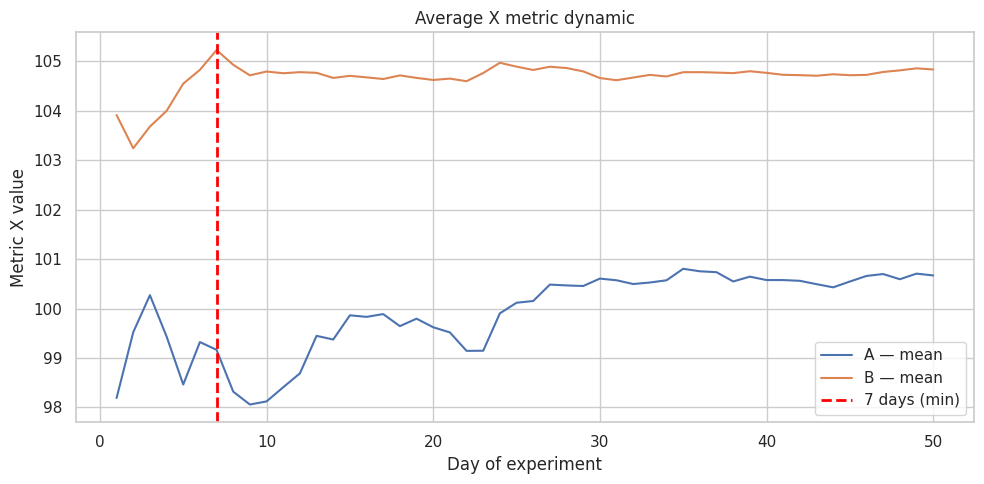

In [27]:
sns.set(style="whitegrid")
number_of_days = 7

plt.figure(figsize=(10, 5))
plt.plot(dataframe['day'], dataframe['mean_A'], label='A — mean')
plt.plot(dataframe['day'], dataframe['mean_B'], label='B — mean')
plt.axvline(number_of_days, color='red', ls='--', lw=2, label=f'{number_of_days} days (min)')
plt.title('Average X metric dynamic')
plt.xlabel('Day of experiment')
plt.ylabel('Metric X value')
plt.legend()
plt.tight_layout()
plt.show()

4. На основе `DataFrame` из предыдущего пункта постройте график динамики p-value по дням теста. Отложите вертикальную линию на этом же графике, показывающую кол-во дней, посчитанных в пункте 1. Сделайте эту линию пунктирной и измените цвет, который вам больше нравится. Также отложите горизонтальную линию – ваш уровень значимости $\alpha$.

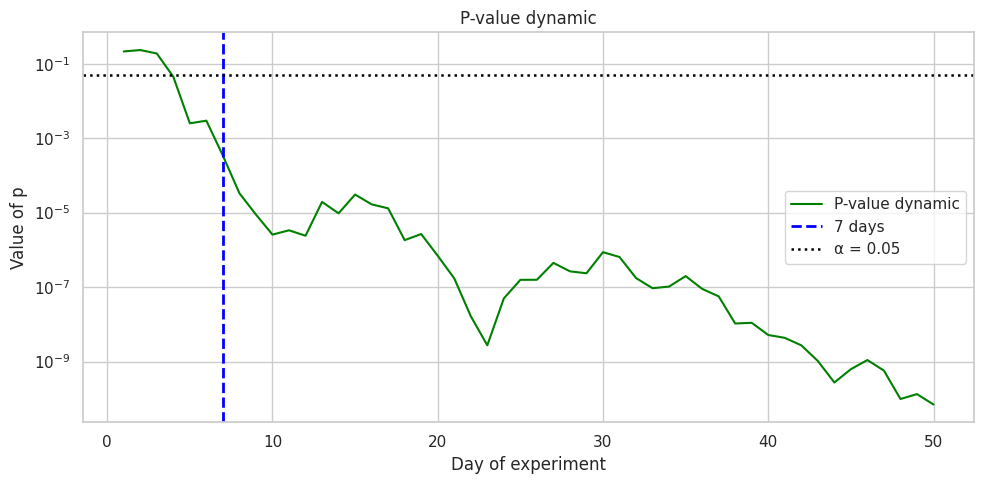

In [28]:
sns.set(style="whitegrid")
number_of_days = 7

plt.figure(figsize=(10, 5))
plt.plot(dataframe['day'], dataframe['p_value'], label='P-value dynamic', color='green')
plt.axvline(number_of_days, color='blue', ls='--', lw=2, label=f'{number_of_days} days')
plt.axhline(0.05, color='black', ls=':', lw=1.8, label='α = 0.05')
plt.yscale('log')
plt.title('P-value dynamic')
plt.xlabel('Day of experiment')
plt.ylabel('Value of p')
plt.legend()
plt.tight_layout()
plt.show()

5. Перегенируруйте шаги 2-4 несколько раз, посмотрев на графики. Что вы видите? Что происходит с p-value в периодах:
    1. до кол-ва дней, посчитанных по формуле из п.1
    2. в точке кол-ва дней, посчитанных по формуле из п.1
    3. после кол-ва дней, посчитанных по формуле из п.1
    
    Опишите выводы максимально подробно.

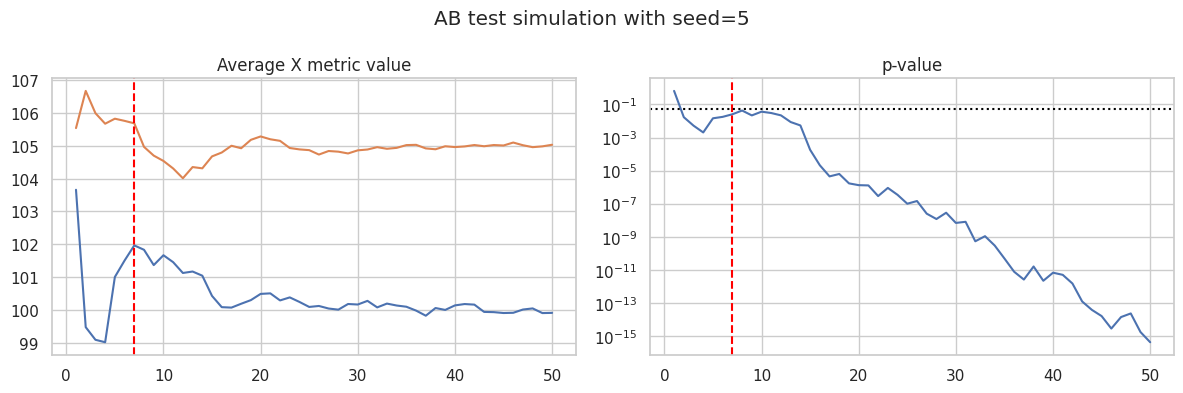

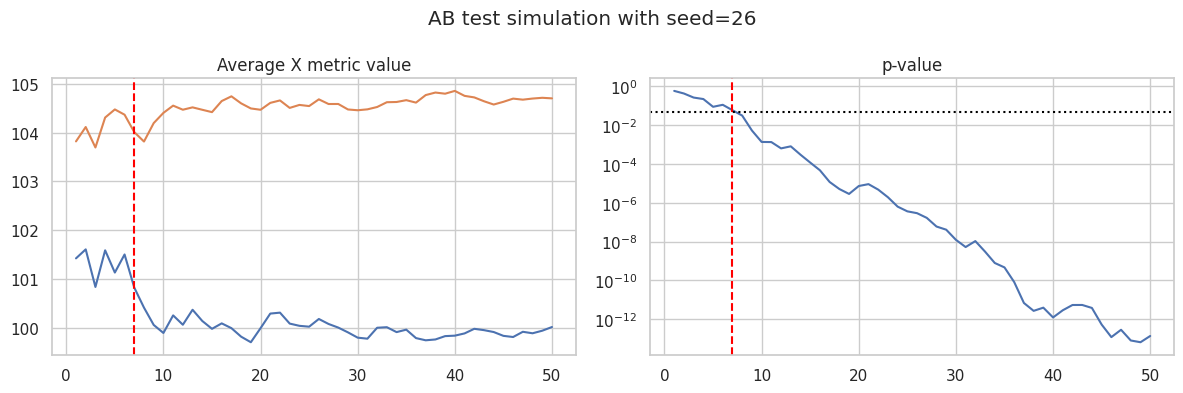

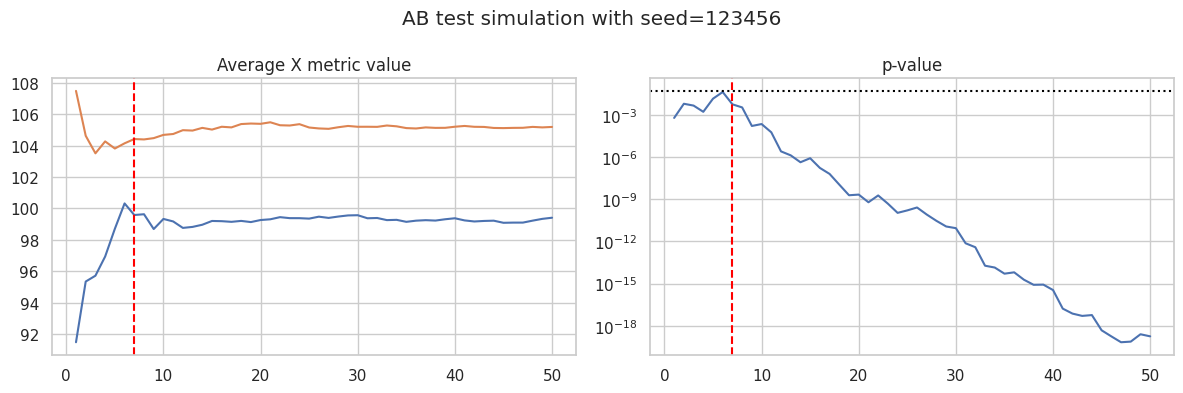

In [6]:
sns.set(style="whitegrid")
for run_seed in [5, 26, 123456]:
    sim_df = AB_simulation(days=50, seed=run_seed)
    plot_run = sim_df
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1);  plt.plot(sim_df.day, sim_df.mean_A, label='A')
    plt.plot(sim_df.day, sim_df.mean_B, label='B')
    plt.axvline(7, ls='--', color='red'); plt.title('Average X metric value')
    plt.subplot(1,2,2);  plt.plot(sim_df.day, sim_df.p_value)
    plt.axvline(7, ls='--', color='red')
    plt.axhline(0.05, ls=':', color='black'); plt.yscale('log'); plt.title('p-value')
    plt.suptitle(f'AB test simulation with seed={run_seed}'); plt.tight_layout(); plt.show()

Before the planned horizon of 7 days, the p-value fluctuates substantially due to limited sample size and high variance. In this early phase, the p-value often exceeds the significance threshold $\alpha$ = 0.05, meaning that the observed differences are not yet statistically reliable. Stopping the test at that stage would risk a Type I error (false positive) or a misleading conclusion based on random noise.

Once the full 7 days of data are collected, the p-value stabilizes and falls below the significance threshold. At this point, the probability of observing such an extreme difference under the null hypothesis becomes very low, and we can confidently reject $H_0$.

This illustrates the so-called “Stop the count” paradox: if you look at the results too early and stop the experiment when the outcome happens to favor your desired narrative, you may draw the wrong conclusion. Proper statistical testing requires committing to a pre-defined horizon (in this case, 7 days) to avoid such biases.

6. Теперь предположим, что мы поменяли наш $MDE$ до $1$ у.е. То есть мат. ожидание в группе А осталось по-прежнему $100$, а вот в группе Б теперь $101$. Перегенерируйте пункты 2-4 для измененного $MDE$, при этом кол-во дней в п.1 не пересчитывайте. Что происходит с p-value? Сделайте выводы.

In [7]:
dataframe = AB_simulation(seed=15, mu_B=101)

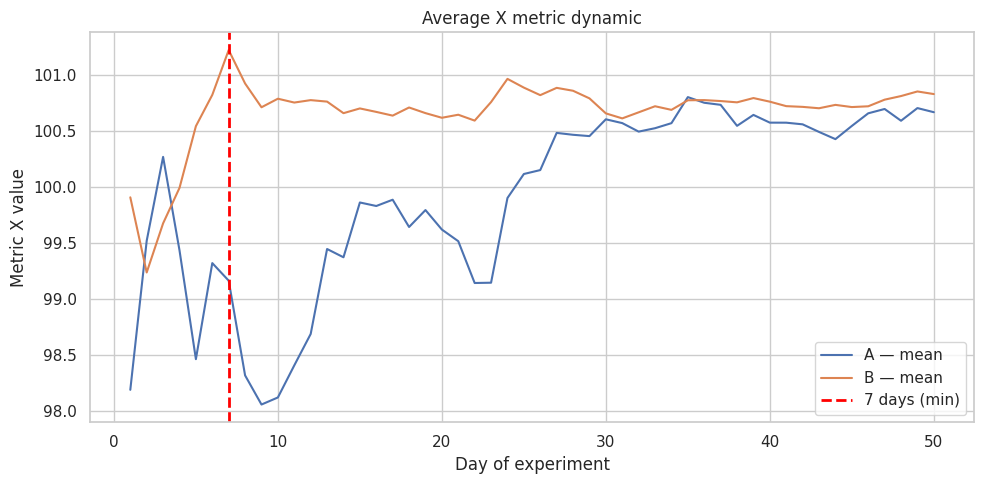

In [8]:
sns.set(style="whitegrid")
number_of_days = 7

plt.figure(figsize=(10, 5))
plt.plot(dataframe['day'], dataframe['mean_A'], label='A — mean')
plt.plot(dataframe['day'], dataframe['mean_B'], label='B — mean')
plt.axvline(number_of_days, color='red', ls='--', lw=2, label=f'{number_of_days} days (min)')
plt.title('Average X metric dynamic')
plt.xlabel('Day of experiment')
plt.ylabel('Metric X value')
plt.legend()
plt.tight_layout()
plt.show()

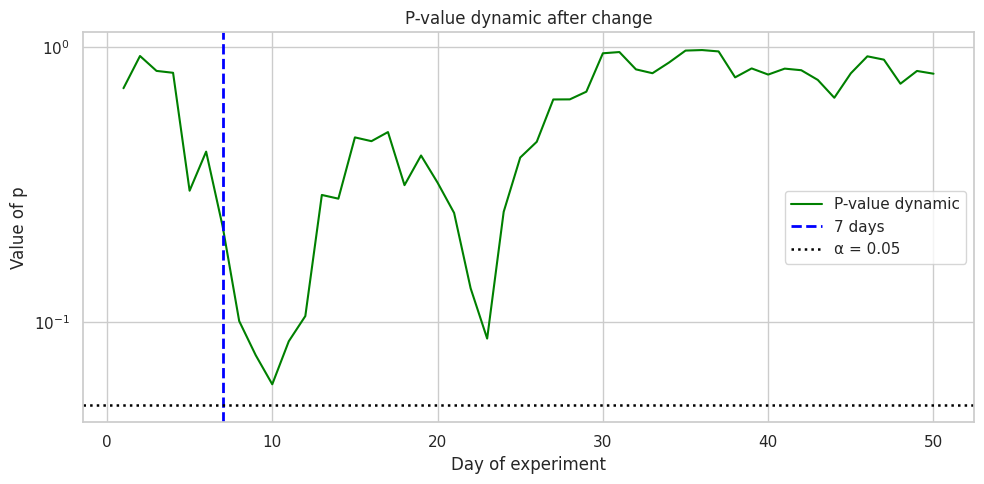

In [9]:
sns.set(style="whitegrid")
number_of_days = 7

plt.figure(figsize=(10, 5))
plt.plot(dataframe['day'], dataframe['p_value'], label='P-value dynamic', color='green')
plt.axvline(number_of_days, color='blue', ls='--', lw=2, label=f'{number_of_days} days')
plt.axhline(0.05, color='black', ls=':', lw=1.8, label='α = 0.05')
plt.yscale('log')
plt.title('P-value dynamic after change')
plt.xlabel('Day of experiment')
plt.ylabel('Value of p')
plt.legend()
plt.tight_layout()
plt.show()

In this scenario, the p-value continues to fluctuate and does not fall below the significance threshold at 7 days or in the days immediately following. This indicates that the observed effect of a +1 shift is too small to be detected reliably within the current experimental horizon. To achieve statistical significance for such a minimal effect, a substantially larger sample size (i.e., more days of data collection) would be required.

If we stop the test too early, we risk committing a Type II error: failing to reject the null hypothesis when a real effect exists. In practice, this means we might incorrectly conclude that the new variant has no impact, when in reality the effect is simply too subtle to detect without additional observations.

__в) [20 баллов] Симуляция А/А-теста__

Теперь представим, что изменений на самом деле никаких нету, то есть мат. ожидание в обоих группах $100$, а $MDE = 0$

1. И снова перегенерируйте вышесделанные пункты 2-4. Что происходит с p-value? Может ли оно оказаться ниже уровня значимости?

In [ ]:
# your code and thoughts here
# =^･ｪ･^=

2. Ну и напоследок, напишите функцию, которая генерирует p-value на последний день A/A теста. А затем запустите эту функцию $1000$ раз, собрав $1000$ значений p-value. Постройте гистограмму их распределения. Что вы видите?

__Подсказка:__ Для такой функции достаточно создать выборку один раз, изменив ее размер.

In [ ]:
# your code and thoughts here
# C (・_・)ノ